# Functions

Functions in code work like mathematical functions

$$y = f(x)$$

* $f()$ is the function
* $x$ is an input (or input*s*)
* $y$ is the returned value, or output(s)

The function's output $y$ depends in some way on the value of $x$ - defined by $f()$.

Not all functions in code take an input, or produce a usable output, but the principle is generally the same.

## My first function

We'll start by defining a function that we'll call `fahr_to_kelvin()`, to convert temperatures from Fahrenheit to Kelvin.

The mathematical function for this would be something like $y = f(x)$ where

$$f(x) = ((x - 32) \times \frac{5}{9}) + 273.15$$

We will write this as a `Python` function, below.

In [1]:
def fahr_to_kelvin(temp):
    return ((temp - 32) * (5/9)) + 273.15

In [2]:
print('freezing point of water:', fahr_to_kelvin(32))
print('boiling point of water:', fahr_to_kelvin(212))

freezing point of water: 273.15
boiling point of water: 373.15


## Composing functions

`Python` functions can be composed, just like mathematical functions:

$$y = f(g(x))$$

Suppose we have a function that converts Kelvin to Celsius, called `kelvin_to_celsius()`, then we could convert a temperature in fahrenheit (`temp_f`) to a temperature in celsius (`temp_c`) by executing the code:

```python
temp_c = kelvin_to_celsius(fahr_to_kelvin(temp_f))
```

We'll create this function below, and then do the calculation.

In [3]:
def kelvin_to_celsius(temp_k):
    return temp_k - 273.15

In [4]:
print('absolute zero in Celsius:', kelvin_to_celsius(0.0))

absolute zero in Celsius: -273.15


In [5]:
temp_f = 212.0
temp_c = kelvin_to_celsius(fahr_to_kelvin(temp_f))
print(temp_c)

100.0


And we can then wrap this inside a third function, `fahr_to_celsius()`

In [6]:
def fahr_to_celsius(temp_f):
    return kelvin_to_celsius(fahr_to_kelvin(temp_f))

In [7]:
print('freezing point of water in Celsius:', fahr_to_celsius(32.0))

freezing point of water in Celsius: 0.0


## Revisiting the Inflammation Analysis

Now that we know how to create and use functions, let's make the inflammation analysis easier to reuse.

In [8]:
%pylab inline

import matplotlib.pyplot
import numpy as np
import os
import seaborn

Populating the interactive namespace from numpy and matplotlib


We'll write one function for each stage of the analysis:

* `analyse()` to plot the loaded data
* `detect_problems()` to check the data quality

In [9]:
def analyse(data):
    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(numpy.mean(data, axis=0))

    axes2.set_ylabel('max')
    axes2.plot(numpy.max(data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(numpy.min(data, axis=0))

    fig.tight_layout()
    matplotlib.pyplot.show()

In [10]:
def detect_problems(data):
    if numpy.max(data, axis=0)[0] == 0 and numpy.max(data, axis=0)[20] == 20:
        print('Suspicious looking maxima!')
    elif numpy.sum(numpy.min(data, axis=0)) == 0:
        print('Minima add up to zero!')
    else:
        print('Seems OK!')

We get a list of input files as before, using a *list comprehension* to obtain paths to all the inflammation study results.

In [11]:
filenames = [os.path.join('data', f) for f in os.listdir('data')
             if f.startswith('inflammation')]

Now we can loop over those filenames to apply the functions we wrote to the analysis of that data.

data/inflammation-01.csv


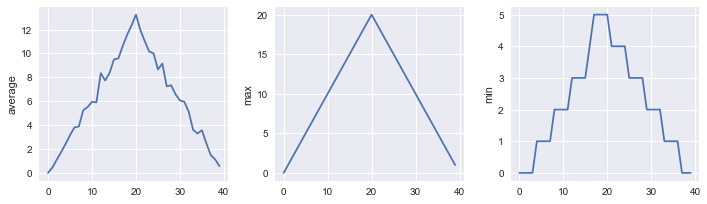

Suspicious looking maxima!
data/inflammation-02.csv


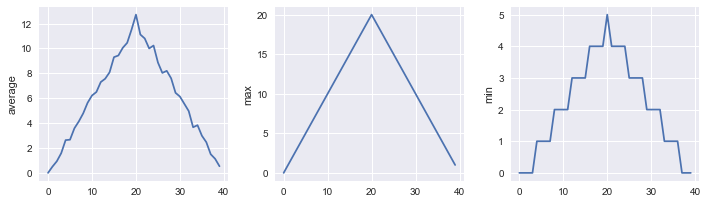

Suspicious looking maxima!
data/inflammation-03.csv


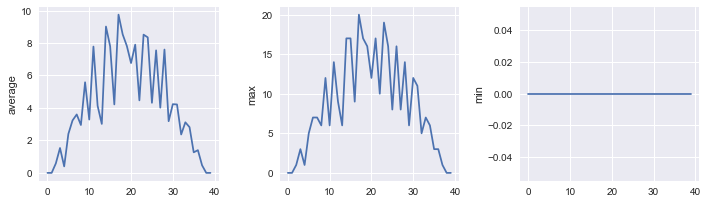

Minima add up to zero!
data/inflammation-04.csv


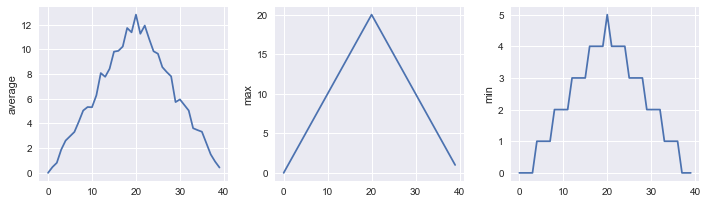

Suspicious looking maxima!
data/inflammation-05.csv


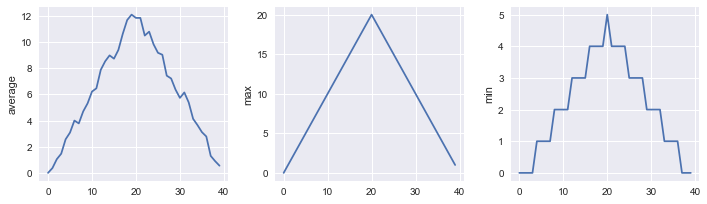

Suspicious looking maxima!
data/inflammation-06.csv


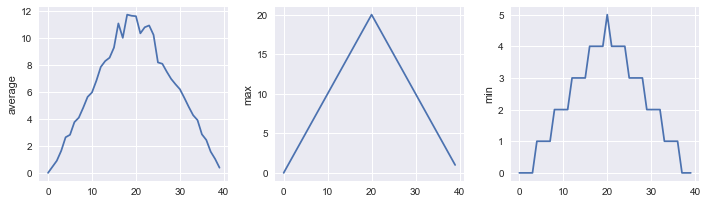

Suspicious looking maxima!
data/inflammation-07.csv


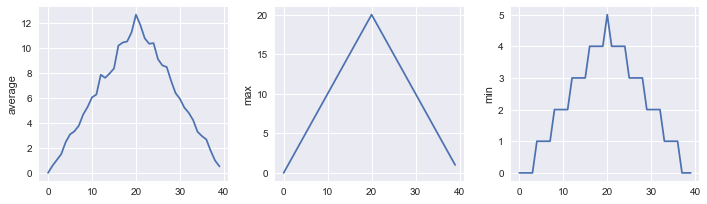

Suspicious looking maxima!
data/inflammation-08.csv


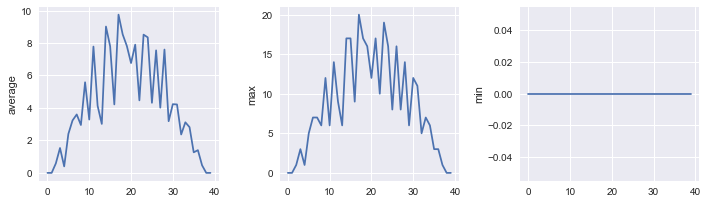

Minima add up to zero!
data/inflammation-09.csv


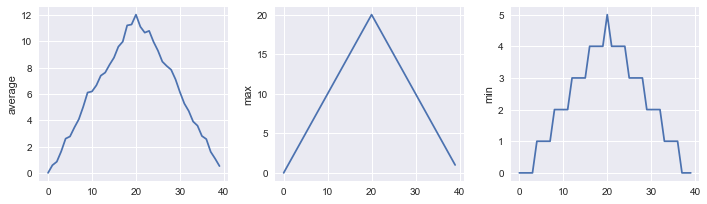

Suspicious looking maxima!
data/inflammation-10.csv


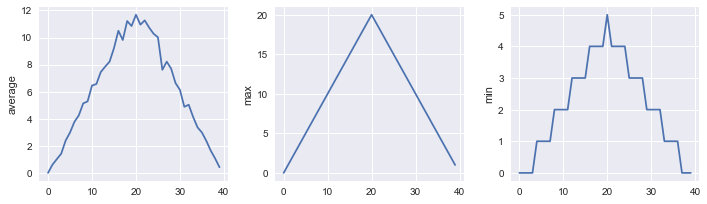

Suspicious looking maxima!
data/inflammation-11.csv


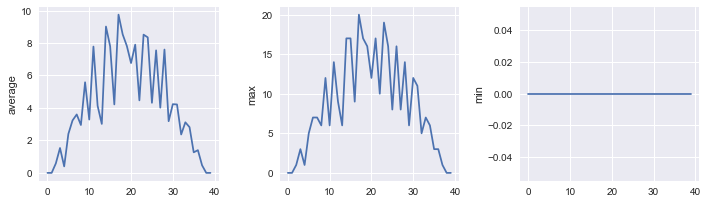

Minima add up to zero!
data/inflammation-12.csv


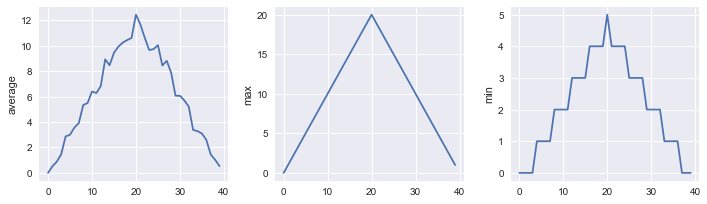

Suspicious looking maxima!


In [12]:
for fname in filenames:
    data = np.loadtxt(fname, delimiter=",")
    print(fname)
    analyse(data)
    detect_problems(data)

This *modularisation* and *abstraction* of the code has made it much more readable.

* The section of code conducting the top-level organisation is easy to read and short: five lines, one line per operation
* The function names are human-readable and descriptive

## Testing Functions

Functions are excellent devices for code reuse, but once functions are written they tend to be used without checking the code. So, it is wise to test functions for correctness of output when they are written (or modified).

To demonstrate this, we will write a function that centres the values in a numerical array, called `centre()`

In [13]:
def centre(data, desired):
    return (data - numpy.mean(data)) + desired

We could test this on a real dataset, *but we don't know what the answer should be*.

We can use `numpy` to create an artificial test set (a matrix of zeroes) and recentre this to `3.0`.

In [14]:
z = np.zeros((2, 2))
print(centre(z, 3.0))

[[ 3.  3.]
 [ 3.  3.]]


This looks good. So we should try it on real data.

In [15]:
data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')
print(centre(data, 0))

[[-6.14875 -6.14875 -5.14875 ..., -3.14875 -6.14875 -6.14875]
 [-6.14875 -5.14875 -4.14875 ..., -5.14875 -6.14875 -5.14875]
 [-6.14875 -5.14875 -5.14875 ..., -4.14875 -5.14875 -5.14875]
 ..., 
 [-6.14875 -5.14875 -5.14875 ..., -5.14875 -5.14875 -5.14875]
 [-6.14875 -6.14875 -6.14875 ..., -6.14875 -4.14875 -6.14875]
 [-6.14875 -6.14875 -5.14875 ..., -5.14875 -5.14875 -6.14875]]


That looks reasonable, but as we don't have an accurate answer, how can we tell the function worked?

One way is to look at bulk properties of the dataset. We'd expect the mean of the new dataset to be approximately `0.0`, and the variance of the dataset to be unchanged. Also, the range (`max - min`) should be unchanged.

In [16]:
centred = centre(data, 0)
print('original min, mean, and max are:', np.min(data), np.mean(data), np.max(data))
print('min, mean, and max of centered data are:', np.min(centred),
      np.mean(centred), np.max(centred))
print('difference in standard deviations before and after:', np.std(data) - np.std(centred))

original min, mean, and max are: 0.0 6.14875 20.0
min, mean, and max of centered data are: -6.14875 2.84217094304e-16 13.85125
difference in standard deviations before and after: 0.0


The range and variance are as expected, and the mean is acceptably close to zero.

The function is probably OK, as-is.

## Documenting Functions

We can document what our function does by writing comments in the code, and this is a good thing.

But `Python` allows us to document what a function does directly in the function using a *docstring*. This is a string that is put in a specific place in the function definition, and it has special properties that are useful.

To add a docstring to our `centre()` function, we add a string immediately after the function declaration:

In [17]:
def centre(data, desired):
    """Returns the array in data, recentered around the desired value."""
    return (data - numpy.mean(data)) + desired

This serves two purposes. It documents the function directly in the source code, but it also hooks that documentation into `Python`'s help system.

We can ask for `help` on any function using the `help()` function:

In [18]:
help(centre)

Help on function centre in module __main__:

centre(data, desired)
    Returns the array in data, recentered around the desired value.



Using the triple quotes (`"""`) allows us to use a multi-line string to describe the function:

In [19]:
def centre(data, desired):
    """Returns the array in data, recentered around the desired value.
    
    Example: centre([1, 2, 3], 0) => [-1, 0, 1]
    """
    return (data - np.mean(data)) + desired

In [20]:
help(centre)

Help on function centre in module __main__:

centre(data, desired)
    Returns the array in data, recentered around the desired value.
    
    Example: centre([1, 2, 3], 0) => [-1, 0, 1]



In [21]:
centre([1, 2, 3], 0)

array([-1.,  0.,  1.])

## Default Arguments

So far we have named the two arguments in our `centre()` function, and we need to specify both of them when we call the function:

In [22]:
centre([1, 2, 3], 0)

array([-1.,  0.,  1.])

We can set a *default* value for function arguments when we define the function, by assigning a value in the function declaration, as follows:

In [23]:
def centre(data, desired=0.0):
    """Returns the array in data, recentered around the desired value.
    
    Example: centre([1, 2, 3], 0) => [-1, 0, 1]
    """
    return (data - np.mean(data)) + desired

Now, by default, the function will recentre the passed data to zero, without us having to specify that.

In [24]:
centre([1, 2, 3])

array([-1.,  0.,  1.])

The value of `desired` is automatically set to `0.0`.

## Readable Code

The two functions that follow are computationally equivalent, but not as readable as each other.

In [25]:
def s(p):
    a = 0
    for v in p:
        a += v
    m = a / len(p)
    d = 0
    for v in p:
        d += (v - m) * (v - m)
    return numpy.sqrt(d / (len(p) - 1))

In [26]:
def std_dev(sample):
    """Returns the sample standard deviation of the input."""
    sample_sum = 0
    for value in sample:
        sample_sum += value

    sample_mean = sample_sum / len(sample)

    sum_squared_devs = 0
    for value in sample:
        sum_squared_devs += (value - sample_mean) * (value - sample_mean)

    return numpy.sqrt(sum_squared_devs / (len(sample) - 1))

You probably found `std_dev()` much easier to read and understand than `s()`.

* both documentation and a programmer’s coding style combine to determine how easy it is for others to read and understand the programmer’s code.
* choosing meaningful variable names and using blank spaces to break the code into logical “chunks” are helpful techniques for producing readable code.

This is useful not only for sharing code with others, but also for the original programmer. If you need to revisit code that you wrote months ago and haven’t thought about since then, you will appreciate the value of readable code!

## Function Scope

Function parameters, and variables defined in functions, are not *visible* outside that function. The extent of 'visibility' of variables is called *scope*, and we say that these variables have *function scope*.

For example, in the code below it may look like the contents of variables are swapped, but this only takes place *inside the function*:

In [27]:
a = 3
b = 7

def swap(a, b):
    temp = a
    a = b
    b = temp
    print("In the function a:", a, "b:", b)

swap(a, b)

print("Outside the function a:", a, "b:", b)

In the function a: 7 b: 3
Outside the function a: 3 b: 7


If you need to get a variable from a function, you should `return` it from the function:

In [28]:
a = 3
b = 7

def swap(a, b):
    temp = a
    a = b
    b = temp
    print("In the function a:", a, "b:", b)
    return (a, b)

(a, b) = swap(a, b)

print("Outside the function a:", a, "b:", b)

In the function a: 7 b: 3
Outside the function a: 7 b: 3
